In [1]:
import pandas as pd
import numpy as np 

In [2]:
import seaborn as sns

In [8]:
import json 
file = json.load( open( "file_name.json" ) )

AttributeError: 'dict' object has no attribute 'shape'

In [151]:
data = pd.read_csv('order_reviews.csv')

In [152]:
data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super recomendo essa loja!",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,"Solicitei a compra de uma capa de retrovisor celta/prisma/meriva - preta - lado esquerdo, mas ch...",2017-12-15 00:00:00,2017-12-16 01:29:43


In [153]:
data = data.drop(['review_id','order_id','review_comment_title','review_creation_date','review_answer_timestamp'],axis=1)

In [154]:
coment_not_nan = data.loc[ data.review_comment_message.isna() == False]

In [155]:
pd.options.display.max_colwidth=100

In [156]:
coment_not_nan

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes do prazo."
...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em condições perfeitas. Estou muito satisfeita!
99990,3,"O produto não foi enviado com NF, não existe venda sem NF, com certeza fico no aguardo do envio ..."
99996,5,"Excelente mochila, entrega super rápida. Super recomendo essa loja!"
99998,1,"Solicitei a compra de uma capa de retrovisor celta/prisma/meriva - preta - lado esquerdo, mas ch..."


In [157]:
def sentiment(score):
    if (score == 5) or (score == 4):
        return 1
    if (score == 3):
        return 0
    if (score == 1) or (score == 2):
        return -1

In [158]:
coment_not_nan['sentiment'] = coment_not_nan.review_score.apply(sentiment)

<ipython-input-158-916182bbb9d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coment_not_nan['sentiment'] = coment_not_nan.review_score.apply(sentiment)


/home/ruiite/.virtualenvs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

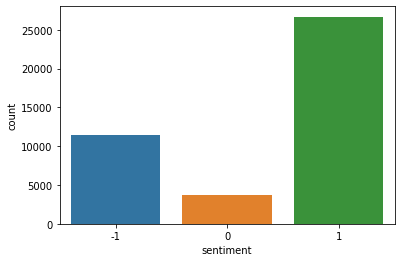

In [159]:
sns.countplot(coment_not_nan.sentiment)

In [12]:
# class disbalance

In [160]:
from nltk.corpus import stopwords

In [161]:
stopwords = stopwords.words("portuguese")

In [162]:
import re

In [163]:
regrex_pattern = re.compile(pattern = "(["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "])+", flags = re.UNICODE)

In [164]:
def remove_emojis(text):
    reduced = re.sub(regrex_pattern,'',text)
    return reduced

In [165]:
def remove_whitespaces(text):
    reduced = re.sub(r'\s',' ',text)
    return reduced

In [166]:
def remove_links(text):
    reduced = re.sub(r'http\S+', '', text)
    return reduced

In [167]:
def remove_stopwords(text):
    text = text.split()
    text = [word for word in text if word not in stopwords]
    text = " ".join(text)
    return text

In [168]:
def remove_punktuation(text):
    reduced = re.sub(r'[.,!?;-]', '',text)
    return reduced

In [169]:
def clean_text(text):
    
    text = text.lower()
    text = remove_punktuation(text)
    text = remove_links(text)
    text = remove_stopwords(text)
    text = remove_emojis(text)
    text = remove_whitespaces(text)
    
    return text

In [170]:
def stemming(text):
    text = text.split()
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

In [171]:
coment_not_nan.review_comment_message = coment_not_nan.review_comment_message.apply(clean_text)

/home/ruiite/.virtualenvs/ds/lib64/python3.9/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [172]:
coment_not_nan.review_comment_message = coment_not_nan.review_comment_message.apply(stemming)

In [173]:
from nltk.stem.snowball import SnowballStemmer

In [174]:
stemmer = SnowballStemmer("portuguese")

In [95]:
stemmer.stem(coment_not_nan.review_comment_message.iloc[0])

'recebi bem antes prazo estipul'

In [112]:
stemmer.stem('recebi')

'receb'

In [106]:
text = 'recebi bem antes prazo estipul'

In [114]:
text

'receb bem antes praz estipul'

In [113]:
text = text.split()
text = [stemmer.stem(word) for word in text]
text = " ".join(text)

In [24]:
coment_not_nan

,review_score,review_comment_message,sentiment
3,5,recebi bem antes prazo estipulado,1
4,5,parabéns lojas lannister adorei comprar internet seguro prático parabéns todos feliz páscoa,1
9,4,aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca co...,1
12,4,pouco travandopelo valor ta boa,1
15,5,vendedor confiável produto ok entrega antes prazo,1
...,...,...,...
99983,5,entregou dentro prazo produto chegou condições perfeitas satisfeita,1
99990,3,produto enviado nf existe venda nf certeza fico aguardo envio nf podendo ser email,0
99996,5,excelente mochila entrega super rápida super recomendo loja,1
99998,1,solicitei compra capa retrovisor celta/prisma/meriva preta lado esquerdo chegou mim capa lado di...,-1


In [175]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Input,Embedding,Bidirectional,LSTM,BatchNormalization,Dense,Dropout
import keras


In [176]:
tokenizer = Tokenizer()

In [177]:
tokenizer.fit_on_texts(coment_not_nan.review_comment_message)

In [178]:
counts = tokenizer.word_counts
print(len(counts))

13134


In [120]:
counts

OrderedDict([('receb', 6689),
             ('bem', 3110),
             ('antes', 5640),
             ('praz', 8386),
             ('estipul', 292),
             ('parabéns', 899),
             ('loj', 2841),
             ('lannist', 1138),
             ('ador', 923),
             ('compr', 7492),
             ('internet', 121),
             ('segur', 183),
             ('prátic', 88),
             ('tod', 1081),
             ('feliz', 151),
             ('pásco', 2),
             ('aparelh', 141),
             ('eficient', 234),
             ('sit', 1231),
             ('marc', 272),
             ('impress', 13),
             ('3desinfector', 1),
             ('cheg', 6515),
             ('outr', 1404),
             ('nomeatualiz', 1),
             ('corret', 1006),
             ('vez', 681),
             ('pouc', 536),
             ('travandopel', 1),
             ('valor', 432),
             ('ta', 54),
             ('boa', 1323),
             ('vendedor', 568),
             ('confiá

In [121]:
total_freq = 0
rare_freq = 0
rare_counts = 0
thread=2

for key,value in counts.items():
    total_freq += value
    if value<thread:
        rare_freq += value
        rare_counts += value

print(f"{rare_counts} are used less than {thread} times")
print(f"And these words accounts for {np.round(rare_freq/total_freq*100,2)}% of whole texts")

7884 are used less than 2 times
And these words accounts for 2.59% of whole texts


In [179]:
word_size=(13134)
vocab_size = word_size+1
tokenizer = Tokenizer(num_words=word_size)

tokenizer.fit_on_texts(coment_not_nan.review_comment_message)
tokenized = tokenizer.texts_to_sequences(coment_not_nan.review_comment_message)

print("\nSamples\n")
print(tokenized[0])
print(tokenized[1])
print(len(tokenized))


Samples

[5, 11, 7, 3, 172]
[55, 12, 33, 52, 4, 367, 262, 463, 55, 36, 309, 3735]
41753


In [123]:
import matplotlib.pyplot as plt

Average length of each row >> 7.281824060546548
Maximum length of each row >> 31


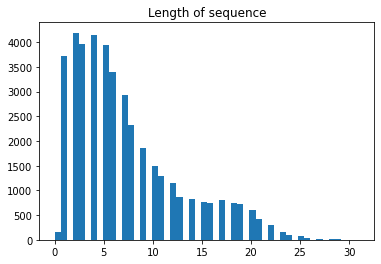

In [180]:
lengths = [len(s) for s in tokenized]
print(f"Average length of each row >> {np.mean(lengths)}")
print(f"Maximum length of each row >> {np.max(lengths)}")

plt.hist(lengths,bins=50)
plt.title('Length of sequence')
plt.show()

In [181]:
sequence_size = 26

In [182]:
padded = pad_sequences(tokenized,maxlen=sequence_size,padding='post',truncating='post')
print(padded.shape)
print("Padded samples")
print(padded[0])
print(padded[1])

(41753, 26)
Padded samples
[  5  11   7   3 172   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0]
[  55   12   33   52    4  367  262  463   55   36  309 3735    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [183]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [184]:
y = coment_not_nan.sentiment

In [185]:
train_data, test_data, train_label, test_label = train_test_split(padded,y,test_size =0.2,random_state=42,stratify=y)

In [186]:
train_label.value_counts()

 1    21344
-1     9126
 0     2932
Name: sentiment, dtype: int64

In [187]:
test_label.value_counts()

 1    5336
-1    2282
 0     733
Name: sentiment, dtype: int64

In [188]:
X_over, y_over = oversample.fit_resample(train_data, train_label)

In [189]:
X_over_1, y_over_1 = oversample.fit_resample(X_over, y_over)

In [190]:
y_over_1.value_counts()

 0    21344
 1    21344
-1    21344
Name: sentiment, dtype: int64

In [191]:
label = to_categorical(y_over_1,num_classes=3)

In [192]:
label

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [193]:
### classes in balance

In [194]:
# less than one percent of messages contains emojis and even less contains only emojis

In [195]:
X_over_1

array([[  5,   1,   5, ...,   0,   0,   0],
       [ 15,   1,   2, ...,   0,   0,   0],
       [  5,   1,  28, ...,   0,   0,   0],
       ...,
       [  5, 126,  64, ...,   0,   0,   0],
       [  2,  97,  47, ...,   0,   0,   0],
       [ 21, 879, 240, ...,   0,   0,   0]], dtype=int32)

In [196]:
y_over_1

0       -1
1        0
2       -1
3       -1
4        1
        ..
64027   -1
64028   -1
64029   -1
64030   -1
64031   -1
Name: sentiment, Length: 64032, dtype: int64

In [197]:
y_over_1.value_counts()

 0    21344
 1    21344
-1    21344
Name: sentiment, dtype: int64

In [198]:
### classes balanced

In [199]:
# X_over_1, y_over_1,test_label,test_data

In [200]:
test_label

4526    -1
74288   -1
27827   -1
15038    1
37062    1
        ..
6357    -1
91295    1
13575    1
41169    1
97101   -1
Name: sentiment, Length: 8351, dtype: int64

In [201]:
y_over_1

0       -1
1        0
2       -1
3       -1
4        1
        ..
64027   -1
64028   -1
64029   -1
64030   -1
64031   -1
Name: sentiment, Length: 64032, dtype: int64

In [202]:
testing_label = to_categorical(test_label,num_classes=3)

In [203]:
testing_label

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
word_vec_size=100
hidden_size=256

def baseline_model():
    X = Input(shape = [sequence_size])
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size)(X)

    #H = BatchNormalization()(H)
    #H = LSTM(hidden_size,return_sequences = True)(H)
    H = BatchNormalization()(H)
    H = LSTM(hidden_size)(H)
    
    
    
    Y = Dense(3,activation='softmax')(H)
    
    model = keras.models.Model(X,Y)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model 
       

In [206]:
lstm_no = baseline_model()
lstm_no_hist = lstm_no.fit(X_over_1,label,epochs=10,batch_size=64,validation_split=0.2)
lstm_no.evaluate(test_data,testing_label)

Epoch 1/10
801/801 [==============================] - 99s 120ms/step - loss: 0.7511 - accuracy: 0.6599 - val_loss: 0.7017 - val_accuracy: 0.7560
Epoch 2/10
801/801 [==============================] - 107s 134ms/step - loss: 0.4588 - accuracy: 0.8150 - val_loss: 0.3691 - val_accuracy: 0.8560
Epoch 3/10
801/801 [==============================] - 82s 103ms/step - loss: 0.3228 - accuracy: 0.8693 - val_loss: 0.4325 - val_accuracy: 0.8097
Epoch 4/10
801/801 [==============================] - 87s 108ms/step - loss: 0.2557 - accuracy: 0.8939 - val_loss: 0.2819 - val_accuracy: 0.9010
Epoch 5/10
801/801 [==============================] - 94s 117ms/step - loss: 0.2104 - accuracy: 0.9105 - val_loss: 0.2680 - val_accuracy: 0.8990
Epoch 6/10
801/801 [==============================] - 94s 117ms/step - loss: 0.1816 - accuracy: 0.9225 - val_loss: 0.2147 - val_accuracy: 0.9288
Epoch 7/10
801/801 [==============================] - 99s 123ms/step - loss: 0.1625 - accuracy: 0.9290 - val_loss: 0.1979 - val_a

[1.102732539176941, 0.7845767140388489]

In [89]:
### baseline model with 1 lstm have accuraccy 80%

In [94]:
### model with 2 lstm overfit with 10 epochs


In [147]:
X_over_1 = pd.DataFrame(X_over_1)
label = pd.DataFrame(label)
test_data = pd.DataFrame(test_data)
testing_label = pd.DataFrame(testing_label)

In [148]:
X_over_1.to_csv('train_text.csv')
label.to_csv('train_label.csv')
test_data.to_csv('test_text.csv')
testing_label.to_csv('test_label.csv')

In [61]:
X_over_1.shape

(64032, 25)

In [62]:
label.shape

(64032, 3)

In [63]:
test_data.shape

(8351, 25)

In [64]:
testing_label.shape

(8351, 3)

In [207]:
import pickle 